# 02. Analysis Seoul Crime

[1. 프로젝트 개요](#프로젝트-개요) <br>
[2. 데이터 개요](#데이터-개요) <br>
[Pandas pivot table](#Pandas-pivot-table) <br>
[3. 서울시 범죄 현황 데이터 정리(pivot_table 사용)](#서울시-범죄-현황-데이터-정리) <br>
[4. Python 모듈 설치(pip, conda)](#python-모듈-설치) <br>
[5. Google Maps API 설치](#google-maps-api-설치) <br>
[Python 반복문](#python-반복문) <br>
[Pandas에 잘 맞춰진 반복문용 명령 iterrows()](#iterrows) <br>
[6. Google Maps를 이용한 데이터 정리](#google-maps를-이용한-데이터-정리) <br>
[컬럼 정리(두줄로 이루어진 컬럼 -> 한줄로 정리)](#컬럼-정리)<br>
[7. 구별 데이터로 정리](#구별-데이터로-정리)<br>
[8. 범죄 데이터 정렬을 위한 데이터 정리](#범죄-데이터-정렬을-위한-데이터-정리) <br>
[seaborn](#seaborn)

[Github에서는 toc가 작동안함. nbviewer로 보기👀](https://nbviewer.org/github/solpinetree/ds_study/blob/main/source_code/02.Analysis%20Seoul%20Crime.ipynb)


<a class="anchor" id="프로젝트-개요"></a>
## 1. 프로젝트 개요 

<a class="anchor" id="데이터-개요"></a>
## 2. 데이터 개요

In [1]:
import numpy as np
import pandas as pd

In [2]:
# 데이터 읽기
crime_raw_data = pd.read_csv("../data/02.crime_in_Seoul.csv", thousands=",", encoding="euc-kr")
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,2
2,중부,강도,발생,3
3,중부,강도,검거,2
4,중부,"강간,추행",발생,137


In [3]:
crime_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   구분      310 non-null    object
 1   죄종      310 non-null    object
 2   발생검거    310 non-null    object
 3   건수      310 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 9.8+ KB


- info() : 데이터의 개요 확인하기
- RangeIndex와 각 컬럼 count 비교

In [4]:
crime_raw_data["죄종"].unique()

array(['살인', '강도', '강간,추행', '절도', '폭력', '강간'], dtype=object)

In [5]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,2
2,중부,강도,발생,3
3,중부,강도,검거,2
4,중부,"강간,추행",발생,137


In [6]:
crime_raw_data.tail()

,구분,죄종,발생검거,건수
305,수서,"강간,추행",검거,175
306,수서,절도,발생,930
307,수서,절도,검거,553
308,수서,폭력,발생,1268
309,수서,폭력,검거,1081


---

<a class="anchor" id="Pandas-pivot-table"></a>
## Pandas pivot table
- index, columns, values, aggfunc

In [7]:
df = pd.read_excel("../data/02.sales-funnel.xlsx")
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


### index 설정

In [8]:
df["Name"].unique()

array(['Trantow-Barrows', 'Fritsch, Russel and Anderson', 'Kiehn-Spinka',
       'Kulas Inc', 'Jerde-Hilpert', 'Barton LLC', 'Herman LLC',
       'Purdy-Kunde', 'Stokes LLC', 'Kassulke, Ondricka and Metz',
       'Keeling LLC', 'Koepp Ltd'], dtype=object)

In [9]:
# Name 컬럼을 인덱스로 설정
# pd.pivot_table(df, index="Name", values=["Account", "Price", "Quantity"])
# values로 집계 가능한 컬럼들만 넘겨야 작동을 함.
df.pivot_table(index="Name", values=["Account", "Price", "Quantity"])  

,Account,Price,Quantity
Name,,,
Barton LLC,740150,35000,1.000000
"Fritsch, Russel and Anderson",737550,35000,1.000000
Herman LLC,141962,65000,2.000000
Jerde-Hilpert,412290,5000,2.000000
"Kassulke, Ondricka and Metz",307599,7000,3.000000
Keeling LLC,688981,100000,5.000000
Kiehn-Spinka,146832,65000,2.000000
Koepp Ltd,729833,35000,2.000000
Kulas Inc,218895,25000,1.500000


In [10]:
# 멀티 인덱스 설정
# values로 집계 가능한 컬럼들만 넘겨야 작동을 함.
df.pivot_table(index=["Name", "Rep", "Manager"], values=["Account", "Price", "Quantity"]) 

,,,Account,Price,Quantity
Name,Rep,Manager,,,
Barton LLC,John Smith,Debra Henley,740150,35000,1.000000
"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,737550,35000,1.000000
Herman LLC,Cedric Moss,Fred Anderson,141962,65000,2.000000
Jerde-Hilpert,John Smith,Debra Henley,412290,5000,2.000000
"Kassulke, Ondricka and Metz",Wendy Yule,Fred Anderson,307599,7000,3.000000
Keeling LLC,Wendy Yule,Fred Anderson,688981,100000,5.000000
Kiehn-Spinka,Daniel Hilton,Debra Henley,146832,65000,2.000000
Koepp Ltd,Wendy Yule,Fred Anderson,729833,35000,2.000000
Kulas Inc,Daniel Hilton,Debra Henley,218895,25000,1.500000


In [11]:
# 멀티 인덱스 설정
df.pivot_table(index=["Manager", "Rep"], values=["Account", "Price", "Quantity"])

Account         Price  Quantity
Manager       Rep                                            
Debra Henley  Craig Booker   720237.0  20000.000000  1.250000
              Daniel Hilton  194874.0  38333.333333  1.666667
              John Smith     576220.0  20000.000000  1.500000
Fred Anderson Cedric Moss    196016.5  27500.000000  1.250000
              Wendy Yule     614061.5  44250.000000  3.000000

### values 설정( + aggfunc 설정)

In [12]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [13]:
# 기본 aggfunc는 np.mean
df.pivot_table(index=["Manager", "Rep"], values="Price")

Price
Manager       Rep                        
Debra Henley  Craig Booker   20000.000000
              Daniel Hilton  38333.333333
              John Smith     20000.000000
Fred Anderson Cedric Moss    27500.000000
              Wendy Yule     44250.000000

In [14]:
# Price 컬럼에 sum 연산 적용
df.pivot_table(index=["Manager", "Rep"], values="Price", aggfunc=np.sum)

Price
Manager       Rep                  
Debra Henley  Craig Booker    80000
              Daniel Hilton  115000
              John Smith      40000
Fred Anderson Cedric Moss    110000
              Wendy Yule     177000

In [15]:
df.pivot_table(index=["Manager", "Rep"], values="Price", aggfunc=[np.sum, len])

sum   len
                              Price Price
Manager       Rep                        
Debra Henley  Craig Booker    80000     4
              Daniel Hilton  115000     3
              John Smith      40000     2
Fred Anderson Cedric Moss    110000     4
              Wendy Yule     177000     4

### columns 설정( + fill_value 설정)
Keys to group by on the pivot table column

In [16]:
df.head()

,Account,Name,Rep,Manager,Product,Quantity,Price,Status
0,714466,Trantow-Barrows,Craig Booker,Debra Henley,CPU,1,30000,presented
1,714466,Trantow-Barrows,Craig Booker,Debra Henley,Software,1,10000,presented
2,714466,Trantow-Barrows,Craig Booker,Debra Henley,Maintenance,2,5000,pending
3,737550,"Fritsch, Russel and Anderson",Craig Booker,Debra Henley,CPU,1,35000,declined
4,146832,Kiehn-Spinka,Daniel Hilton,Debra Henley,CPU,2,65000,won


In [17]:
# Product를 컬럼으로 지정
df.pivot_table(index=["Manager", "Rep"], values="Price", columns="Product", aggfunc=np.sum)

Product                           CPU  Maintenance  Monitor  Software
Manager       Rep                                                    
Debra Henley  Craig Booker    65000.0       5000.0      NaN   10000.0
              Daniel Hilton  105000.0          NaN      NaN   10000.0
              John Smith      35000.0       5000.0      NaN       NaN
Fred Anderson Cedric Moss     95000.0       5000.0      NaN   10000.0
              Wendy Yule     165000.0       7000.0   5000.0       NaN

In [18]:
# Nan 값 설정 : fill_value
df.pivot_table(index=["Manager", "Rep"], values="Price", columns="Product", aggfunc=np.sum, fill_value=0)

Product                         CPU  Maintenance  Monitor  Software
Manager       Rep                                                  
Debra Henley  Craig Booker    65000         5000        0     10000
              Daniel Hilton  105000            0        0     10000
              John Smith      35000         5000        0         0
Fred Anderson Cedric Moss     95000         5000        0     10000
              Wendy Yule     165000         7000     5000         0

###  2개 이상 index, values 설정

In [19]:
df.pivot_table(index=["Manager", "Rep", "Product"], values=["Price", "Quantity"], aggfunc=np.sum, fill_value=0)

Price  Quantity
Manager       Rep           Product                      
Debra Henley  Craig Booker  CPU           65000         2
                            Maintenance    5000         2
                            Software      10000         1
              Daniel Hilton CPU          105000         4
                            Software      10000         1
              John Smith    CPU           35000         1
                            Maintenance    5000         2
Fred Anderson Cedric Moss   CPU           95000         3
                            Maintenance    5000         1
                            Software      10000         1
              Wendy Yule    CPU          165000         7
                            Maintenance    7000         3
                            Monitor        5000         2

In [20]:
df.pivot_table(
    index=["Manager", "Rep", "Product"], 
    values=["Price", "Quantity"], 
    aggfunc=[np.sum, np.mean], 
    fill_value=0,
    margins=True) # 총계(All) 추가

sum                   mean  \
                                          Price Quantity         Price   
Manager       Rep           Product                                      
Debra Henley  Craig Booker  CPU           65000        2  32500.000000   
                            Maintenance    5000        2   5000.000000   
                            Software      10000        1  10000.000000   
              Daniel Hilton CPU          105000        4  52500.000000   
                            Software      10000        1  10000.000000   
              John Smith    CPU           35000        1  35000.000000   
                            Maintenance    5000        2   5000.000000   
Fred Anderson Cedric Moss   CPU           95000        3  47500.000000   
                            Maintenance    5000        1   5000.000000   
                            Software      10000        1  10000.000000   
              Wendy Yule    CPU          165000        7  82500.000000   
                            Maintenance    7000        3   7000.000000   
                            Monitor        5000        2   5000.000000   
All                                      522000       30  30705.882353   

                                                   
                                         Quantity  
Manager       Rep           Product                
Debra Henley  Craig Booker  CPU          1.000000  
                            Maintenance  2.000000  
                            Software     1.000000  
              Daniel Hilton CPU          2.000000  
                            Software     1.000000  
              John Smith    CPU          1.000000  
                            Maintenance  2.000000  
Fred Anderson Cedric Moss   CPU          1.500000  
                            Maintenance  1.000000  
                            Software     1.000000  
              Wendy Yule    CPU          3.500000  
                            Maintenance  3.000000  
                            Monitor      2.000000  
All                                      1.764706


---

<a class="anchor" id="서울시-범죄-현황-데이터-정리"></a>
## 3. 서울시 범죄 현황 데이터 정리(pivot_table 사용)

</detail>

In [21]:
crime_raw_data.head()

,구분,죄종,발생검거,건수
0,중부,살인,발생,1
1,중부,살인,검거,2
2,중부,강도,발생,3
3,중부,강도,검거,2
4,중부,"강간,추행",발생,137


In [22]:
crime_station = crime_raw_data.pivot_table(
    crime_raw_data, 
    index="구분", 
    columns=["죄종", "발생검거"], 
    aggfunc=[np.sum],
    fill_value=0)

crime_station.head()

sum                                                   
      건수                                                   
죄종    강간    강간,추행      강도    살인        절도          폭력      
발생검거  검거 발생    검거   발생 검거 발생 검거  발생    검거    발생    검거    발생
구분                                                         
강남     0  0   359  458  8  9  5   6   654  1565  2178  2494
강동     0  0   134  157  5  5  6   5   900  1672  1599  1872
강북     0  0   147  177  6  5  4   5   589   872  1597  1773
강서     0  0   195  261  7  7  3   3  1185  1991  2201  2401
관악     0  0   279  327  8  9  8  10  1050  1966  2066  2567

In [23]:
crime_station.columns # Multiindex

MultiIndex([('sum', '건수',    '강간', '검거'),
            ('sum', '건수',    '강간', '발생'),
            ('sum', '건수', '강간,추행', '검거'),
            ('sum', '건수', '강간,추행', '발생'),
            ('sum', '건수',    '강도', '검거'),
            ('sum', '건수',    '강도', '발생'),
            ('sum', '건수',    '살인', '검거'),
            ('sum', '건수',    '살인', '발생'),
            ('sum', '건수',    '절도', '검거'),
            ('sum', '건수',    '절도', '발생'),
            ('sum', '건수',    '폭력', '검거'),
            ('sum', '건수',    '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

### 죄종 컬럼에서 `강간`과 `강간,추행` 데이터 합침

In [24]:
crime_station["sum", "건수", "강간", "검거"]

구분
강남      0
강동      0
강북      0
강서      0
관악      0
광진      0
구로      0
금천      0
남대문     0
노원      0
도봉     54
동대문     0
동작      0
마포      0
방배     46
서대문     0
서부      0
서초      0
성동      0
성북     78
송파      0
수서      0
양천     92
영등포     0
용산      0
은평      0
종로      0
종암     51
중랑      0
중부      0
혜화      0
Name: (sum, 건수, 강간, 검거), dtype: int64

In [25]:
crime_station["sum", "건수", "강간,추행", "검거"]

구분
강남     359
강동     134
강북     147
강서     195
관악     279
광진     174
구로     145
금천      87
남대문     36
노원     151
도봉       0
동대문    106
동작     107
마포     368
방배       0
서대문    144
서부      64
서초     282
성동      97
성북       0
송파     220
수서     175
양천       0
영등포    237
용산     238
은평      82
종로     120
종암       0
중랑     121
중부      87
혜화      60
Name: (sum, 건수, 강간,추행, 검거), dtype: int64

In [26]:
crime_station["sum", "건수", "강간,추행", "검거"] = crime_station["sum", "건수", "강간,추행", "검거"]  + crime_station["sum", "건수", "강간", "검거"] 
crime_station["sum", "건수", "강간,추행", "검거"]

구분
강남     359
강동     134
강북     147
강서     195
관악     279
광진     174
구로     145
금천      87
남대문     36
노원     151
도봉      54
동대문    106
동작     107
마포     368
방배      46
서대문    144
서부      64
서초     282
성동      97
성북      78
송파     220
수서     175
양천      92
영등포    237
용산     238
은평      82
종로     120
종암      51
중랑     121
중부      87
혜화      60
Name: (sum, 건수, 강간,추행, 검거), dtype: int64

In [27]:
crime_station["sum", "건수", "강간", "발생"]

구분
강남       0
강동       0
강북       0
강서       0
관악       0
광진       0
구로       0
금천       0
남대문      0
노원       0
도봉      70
동대문      0
동작       0
마포       0
방배      61
서대문      0
서부       0
서초       0
성동       0
성북     103
송파       0
수서       0
양천     114
영등포      0
용산       0
은평       0
종로       0
종암      55
중랑       0
중부       0
혜화       0
Name: (sum, 건수, 강간, 발생), dtype: int64

In [28]:
crime_station["sum", "건수", "강간,추행", "발생"]

구분
강남     458
강동     157
강북     177
강서     261
관악     327
광진     230
구로     217
금천     127
남대문     57
노원     180
도봉       0
동대문    125
동작     212
마포     436
방배       0
서대문    157
서부      82
서초     370
성동     125
성북       0
송파     290
수서     209
양천       0
영등포    327
용산     280
은평      94
종로     142
종암       0
중랑     150
중부     137
혜화      86
Name: (sum, 건수, 강간,추행, 발생), dtype: int64

In [29]:
crime_station["sum", "건수", "강간,추행", "발생"] = crime_station["sum", "건수", "강간,추행", "발생"]  + crime_station["sum", "건수", "강간", "발생"] 
crime_station["sum", "건수", "강간,추행", "발생"]

구분
강남     458
강동     157
강북     177
강서     261
관악     327
광진     230
구로     217
금천     127
남대문     57
노원     180
도봉      70
동대문    125
동작     212
마포     436
방배      61
서대문    157
서부      82
서초     370
성동     125
성북     103
송파     290
수서     209
양천     114
영등포    327
용산     280
은평      94
종로     142
종암      55
중랑     150
중부     137
혜화      86
Name: (sum, 건수, 강간,추행, 발생), dtype: int64

In [30]:
crime_station.columns

MultiIndex([('sum', '건수',    '강간', '검거'),
            ('sum', '건수',    '강간', '발생'),
            ('sum', '건수', '강간,추행', '검거'),
            ('sum', '건수', '강간,추행', '발생'),
            ('sum', '건수',    '강도', '검거'),
            ('sum', '건수',    '강도', '발생'),
            ('sum', '건수',    '살인', '검거'),
            ('sum', '건수',    '살인', '발생'),
            ('sum', '건수',    '절도', '검거'),
            ('sum', '건수',    '절도', '발생'),
            ('sum', '건수',    '폭력', '검거'),
            ('sum', '건수',    '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

In [31]:
crime_station.drop([("sum", "건수", "강간", "발생"), ("sum", "건수", "강간", "검거")], axis = 1, inplace=True)
crime_station.head()

sum                                          
        건수                                          
죄종   강간,추행      강도    살인        절도          폭력      
발생검거    검거   발생 검거 발생 검거  발생    검거    발생    검거    발생
구분                                                  
강남     359  458  8  9  5   6   654  1565  2178  2494
강동     134  157  5  5  6   5   900  1672  1599  1872
강북     147  177  6  5  4   5   589   872  1597  1773
강서     195  261  7  7  3   3  1185  1991  2201  2401
관악     279  327  8  9  8  10  1050  1966  2066  2567

### MultiIndex 정리

In [32]:
crime_station.columns

MultiIndex([('sum', '건수', '강간,추행', '검거'),
            ('sum', '건수', '강간,추행', '발생'),
            ('sum', '건수',    '강도', '검거'),
            ('sum', '건수',    '강도', '발생'),
            ('sum', '건수',    '살인', '검거'),
            ('sum', '건수',    '살인', '발생'),
            ('sum', '건수',    '절도', '검거'),
            ('sum', '건수',    '절도', '발생'),
            ('sum', '건수',    '폭력', '검거'),
            ('sum', '건수',    '폭력', '발생')],
           names=[None, None, '죄종', '발생검거'])

In [33]:
crime_station.columns = crime_station.columns.droplevel([0, 1]) # 다중 컬럼에서 특정 컬럼 제거

In [34]:
crime_station.columns

MultiIndex([('강간,추행', '검거'),
            ('강간,추행', '발생'),
            (   '강도', '검거'),
            (   '강도', '발생'),
            (   '살인', '검거'),
            (   '살인', '발생'),
            (   '절도', '검거'),
            (   '절도', '발생'),
            (   '폭력', '검거'),
            (   '폭력', '발생')],
           names=['죄종', '발생검거'])

In [35]:
crime_station.head()

죄종   강간,추행      강도    살인        절도          폭력      
발생검거    검거   발생 검거 발생 검거  발생    검거    발생    검거    발생
구분                                                  
강남     359  458  8  9  5   6   654  1565  2178  2494
강동     134  157  5  5  6   5   900  1672  1599  1872
강북     147  177  6  5  4   5   589   872  1597  1773
강서     195  261  7  7  3   3  1185  1991  2201  2401
관악     279  327  8  9  8  10  1050  1966  2066  2567

### index 확인

In [36]:
crime_station.index

Index(['강남', '강동', '강북', '강서', '관악', '광진', '구로', '금천', '남대문', '노원', '도봉',
       '동대문', '동작', '마포', '방배', '서대문', '서부', '서초', '성동', '성북', '송파', '수서',
       '양천', '영등포', '용산', '은평', '종로', '종암', '중랑', '중부', '혜화'],
      dtype='object', name='구분')

- 현재 index는 경찰서 이름으로 되어있음
- 경찰서 이름으로 구 이름을 알아내야함

---

<a class="anchor" id="python-모듈-설치"></a>
## 4. Python 모듈 설치

### pip 명령
- python의 공식 모듈 관리자
- pip list
- pip install module_name
- pip uninstall module_name

In [37]:
# !pip list
get_ipython().system("pip list")

Package                   Version
------------------------- -----------
anyio                     4.2.0
appnope                   0.1.2
argon2-cffi               21.3.0
argon2-cffi-bindings      21.2.0
asttokens                 2.0.5
async-lru                 2.0.4
attrs                     23.1.0
Babel                     2.11.0
backcall                  0.2.0
beautifulsoup4            4.12.3
bleach                    4.1.0
Bottleneck                1.3.7
Brotli                    1.0.9
certifi                   2024.7.4
cffi                      1.16.0
charset-normalizer        2.0.4
click                     8.1.7
comm                      0.2.1
contourpy                 1.0.5
cycler                    0.11.0
debugpy                   1.6.7
decorator                 5.1.1
defusedxml                0.7.1
et-xmlfile                1.1.0
exceptiongroup            1.2.0
executing                 0.8.3
fastjsonschema            2.16.2
fonttools                 4.51.0
googlemaps          

### conda 명령
- conda list
- conda install module_name
- conda uninstall module_name
- conda install -c channel_name module_name
    - 지정된 배포 채널에서 모듈 설치

---

<a class="anchor" id="google-maps-api-설치"></a>
## 5. Google Maps API 설치 

In [38]:
import googlemaps

In [39]:
from dotenv import load_dotenv
import os

load_dotenv('.env')
gmaps_key = os.environ.get('GCP_API_KEY')
gmaps = googlemaps.Client(key=gmaps_key)

In [40]:
gmaps.geocode("서울영등포경찰서", language="ko")

[{'address_components': [{'long_name': '608',
    'short_name': '608',
    'types': ['premise']},
   {'long_name': '국회대로',
    'short_name': '국회대로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '영등포구',
    'short_name': '영등포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '150-043',
    'short_name': '150-043',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
  'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5273930802915,
     'lng': 126.9021580802915},
    'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
  'partial_match': True,
  'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6s

---

<a class="anchor" id="python-반복문"></a>
## Python 반복문

### 간단한 for문 예제

In [41]:
for n in [1, 2, 3, 4]:
    print("Number is", n)

Number is 1
Number is 2
Number is 3
Number is 4


### 조금 복잡한 for문 예제

In [42]:
for n in range(0, 10):
    print(n**2)

0
1
4
9
16
25
36
49
64
81


### 위 코드를 한 줄로 : list comprehension

In [43]:
[n**2 for n in range(0, 10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

<a class="anchor" id="iterrows"></a>
## Pandas에 잘 맞춰진 반복문용 명령 iterrows()
- Pandas 데이터 프레임은 대부분 2차원
- 이럴 떄 for문을 사용하면, n번째라는 지정을 반복해서 가독률이 떨어짐
- Pandas 데이터 프레임으로 반복문을 만들 때 iterrows() 옵션을 사용하면 편함
- 받을 때, 인덱스와 내용으로 나누어 받는 것 주의

---

<a class="anchor" id="google-maps를-이용한-데이터-정리"></a>
## 6. Google Maps를 이용한 데이터 정리 

### Google Maps API Response - 구별, lat, lng 데이터 추출

In [44]:
gmaps.geocode("서울영등포경찰서", language="ko")

[{'address_components': [{'long_name': '608',
    'short_name': '608',
    'types': ['premise']},
   {'long_name': '국회대로',
    'short_name': '국회대로',
    'types': ['political', 'sublocality', 'sublocality_level_4']},
   {'long_name': '영등포구',
    'short_name': '영등포구',
    'types': ['political', 'sublocality', 'sublocality_level_1']},
   {'long_name': '서울특별시',
    'short_name': '서울특별시',
    'types': ['administrative_area_level_1', 'political']},
   {'long_name': '대한민국',
    'short_name': 'KR',
    'types': ['country', 'political']},
   {'long_name': '150-043',
    'short_name': '150-043',
    'types': ['postal_code']}],
  'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
  'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
   'location_type': 'ROOFTOP',
   'viewport': {'northeast': {'lat': 37.5273930802915,
     'lng': 126.9021580802915},
    'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
  'partial_match': True,
  'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6s

In [45]:
tmp = gmaps.geocode("서울영등포경찰서", language="ko")

In [46]:
len(tmp) #리스트로 감싸져 있음

1

In [47]:
tmp[0] 

{'address_components': [{'long_name': '608',
   'short_name': '608',
   'types': ['premise']},
  {'long_name': '국회대로',
   'short_name': '국회대로',
   'types': ['political', 'sublocality', 'sublocality_level_4']},
  {'long_name': '영등포구',
   'short_name': '영등포구',
   'types': ['political', 'sublocality', 'sublocality_level_1']},
  {'long_name': '서울특별시',
   'short_name': '서울특별시',
   'types': ['administrative_area_level_1', 'political']},
  {'long_name': '대한민국', 'short_name': 'KR', 'types': ['country', 'political']},
  {'long_name': '150-043', 'short_name': '150-043', 'types': ['postal_code']}],
 'formatted_address': '대한민국 서울특별시 영등포구 국회대로 608',
 'geometry': {'location': {'lat': 37.5260441, 'lng': 126.9008091},
  'location_type': 'ROOFTOP',
  'viewport': {'northeast': {'lat': 37.5273930802915,
    'lng': 126.9021580802915},
   'southwest': {'lat': 37.5246951197085, 'lng': 126.8994601197085}}},
 'partial_match': True,
 'place_id': 'ChIJ1TimJLaffDURptXOs0Tj6sY',
 'plus_code': {'compound_code': 'G

In [48]:
print(tmp[0].get("geometry")["location"]["lat"])
print(tmp[0].get("geometry")["location"]["lng"])

37.5260441
126.9008091


In [49]:
print(tmp[0].get("formatted_address"))

대한민국 서울특별시 영등포구 국회대로 608


In [50]:
# 구만 추출
tmp[0].get("formatted_address").split()[2]

'영등포구'

In [51]:
crime_station.head()

죄종   강간,추행      강도    살인        절도          폭력      
발생검거    검거   발생 검거 발생 검거  발생    검거    발생    검거    발생
구분                                                  
강남     359  458  8  9  5   6   654  1565  2178  2494
강동     134  157  5  5  6   5   900  1672  1599  1872
강북     147  177  6  5  4   5   589   872  1597  1773
강서     195  261  7  7  3   3  1185  1991  2201  2401
관악     279  327  8  9  8  10  1050  1966  2066  2567

### 기존 데이터프레임에 구별, lat, lng 컬럼 추가

#### 구이름과 위도, 경도 정보를 저장할 준비

In [52]:
# 컬럼 추가하고 모든 값을 nan 값으로 일단 채움
crime_station["구별"] = np.nan
crime_station["lat"] = np.nan
crime_station["lng"] = np.nan

In [53]:
crime_station.head()

죄종   강간,추행      강도    살인        절도          폭력        구별 lat lng
발생검거    검거   발생 검거 발생 검거  발생    검거    발생    검거    발생            
구분                                                              
강남     359  458  8  9  5   6   654  1565  2178  2494 NaN NaN NaN
강동     134  157  5  5  6   5   900  1672  1599  1872 NaN NaN NaN
강북     147  177  6  5  4   5   589   872  1597  1773 NaN NaN NaN
강서     195  261  7  7  3   3  1185  1991  2201  2401 NaN NaN NaN
관악     279  327  8  9  8  10  1050  1966  2066  2567 NaN NaN NaN

#### 반복문을 이용해서 위 표의 NaN 값을 모두 채워줌

In [54]:
completed_row_count = 0

for idx, rows in crime_station.iterrows():
    station_name = "서울" + str(idx) + "경찰서"
    tmp = gmaps.geocode(station_name, language="ko")
    
    gu = tmp[0].get("formatted_address").split()[2]
    lat = tmp[0].get("geometry")["location"]["lat"]
    lng = tmp[0].get("geometry")["location"]["lng"]

    crime_station.loc[idx, '구별'] = gu
    crime_station.loc[idx, 'lat'] = lat
    crime_station.loc[idx, 'lng'] = lng

    print(f'completed row count : {completed_row_count}')
    completed_row_count += 1

completed row count : 0
completed row count : 1
completed row count : 2
completed row count : 3
completed row count : 4
completed row count : 5
completed row count : 6
completed row count : 7
completed row count : 8
completed row count : 9
completed row count : 10
completed row count : 11
completed row count : 12
completed row count : 13
completed row count : 14
completed row count : 15
completed row count : 16
completed row count : 17
completed row count : 18
completed row count : 19
completed row count : 20
completed row count : 21
completed row count : 22
completed row count : 23
completed row count : 24
completed row count : 25
completed row count : 26
completed row count : 27
completed row count : 28
completed row count : 29
completed row count : 30


In [55]:
crime_station.head()

죄종   강간,추행      강도    살인        절도          폭력         구별        lat  \
발생검거    검거   발생 검거 발생 검거  발생    검거    발생    검거    발생                   
구분                                                                     
강남     359  458  8  9  5   6   654  1565  2178  2494  강남구  37.509435   
강동     134  157  5  5  6   5   900  1672  1599  1872  강동구  37.528511   
강북     147  177  6  5  4   5   589   872  1597  1773  강북구  37.637197   
강서     195  261  7  7  3   3  1185  1991  2201  2401  강서구  37.551362   
관악     279  327  8  9  8  10  1050  1966  2066  2567  관악구  37.474395   

죄종           lng  
발생검거              
구분                
강남    127.066958  
강동    127.126822  
강북    127.027305  
강서    126.850280  
관악    126.951349

---

<a class="anchor" id="컬럼-정리"></a>
## 컬럼 정리(두줄로 이루어진 컬럼 -> 한줄로 정리)

In [56]:
crime_station.columns

MultiIndex([('강간,추행', '검거'),
            ('강간,추행', '발생'),
            (   '강도', '검거'),
            (   '강도', '발생'),
            (   '살인', '검거'),
            (   '살인', '발생'),
            (   '절도', '검거'),
            (   '절도', '발생'),
            (   '폭력', '검거'),
            (   '폭력', '발생'),
            (   '구별',   ''),
            (  'lat',   ''),
            (  'lng',   '')],
           names=['죄종', '발생검거'])

In [57]:
crime_station.columns.get_level_values(0)

Index(['강간,추행', '강간,추행', '강도', '강도', '살인', '살인', '절도', '절도', '폭력', '폭력', '구별',
       'lat', 'lng'],
      dtype='object', name='죄종')

In [58]:
crime_station.columns.get_level_values(1)

Index(['검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '검거', '발생', '', '', ''], dtype='object', name='발생검거')

In [59]:
tmp = [
    crime_station.columns.get_level_values(0)[n] + crime_station.columns.get_level_values(1)[n]
    for n in range(0, len(crime_station.columns.get_level_values(0)))
]
tmp

['강간,추행검거',
 '강간,추행발생',
 '강도검거',
 '강도발생',
 '살인검거',
 '살인발생',
 '절도검거',
 '절도발생',
 '폭력검거',
 '폭력발생',
 '구별',
 'lat',
 'lng']

In [60]:
crime_station.columns = tmp

In [61]:
crime_station.head()

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,359,458,8,9,5,6,654,1565,2178,2494,강남구,37.509435,127.066958
강동,134,157,5,5,6,5,900,1672,1599,1872,강동구,37.528511,127.126822
강북,147,177,6,5,4,5,589,872,1597,1773,강북구,37.637197,127.027305
강서,195,261,7,7,3,3,1185,1991,2201,2401,강서구,37.551362,126.850280
관악,279,327,8,9,8,10,1050,1966,2066,2567,관악구,37.474395,126.951349


In [62]:
# 데이터 저장
crime_station.to_csv("../data/02. crime_in_Seoul_raw.csv", sep=",", encoding="utf-8")

---

<a class="anchor" id="구별-데이터로-정리"></a>
## 7. 구별 데이터로 정리

In [63]:
crime_anal_station = pd.read_csv(
    "../data/02. crime_in_Seoul_raw.csv", index_col=0, encoding="utf-8") # index_col "구분"을 인덱스 컬럼으로 설정
crime_anal_station.head()

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,구별,lat,lng
구분,,,,,,,,,,,,,
강남,359,458,8,9,5,6,654,1565,2178,2494,강남구,37.509435,127.066958
강동,134,157,5,5,6,5,900,1672,1599,1872,강동구,37.528511,127.126822
강북,147,177,6,5,4,5,589,872,1597,1773,강북구,37.637197,127.027305
강서,195,261,7,7,3,3,1185,1991,2201,2401,강서구,37.551362,126.850280
관악,279,327,8,9,8,10,1050,1966,2066,2567,관악구,37.474395,126.951349


In [64]:
crime_anal_gu = pd.pivot_table(crime_anal_station, index="구별", aggfunc=np.sum)
crime_anal_gu.head()

,lat,lng,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,,,
강남구,75.002925,254.144170,534,667,10,11,10,12,1207,2495,3259,3762
강동구,37.528511,127.126822,134,157,5,5,6,5,900,1672,1599,1872
강북구,37.637197,127.027305,147,177,6,5,4,5,589,872,1597,1773
강서구,37.551362,126.850280,195,261,7,7,3,3,1185,1991,2201,2401
관악구,37.474395,126.951349,279,327,8,9,8,10,1050,1966,2066,2567


In [65]:
# lat, lng 는 aggfunc=np.sum 에서 더하면 의미없는 값이므로 지움
del crime_anal_gu["lat"]
crime_anal_gu.drop("lng", axis=1, inplace=True)

In [66]:
crime_anal_gu.head()

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생
구별,,,,,,,,,,
강남구,534,667,10,11,10,12,1207,2495,3259,3762
강동구,134,157,5,5,6,5,900,1672,1599,1872
강북구,147,177,6,5,4,5,589,872,1597,1773
강서구,195,261,7,7,3,3,1185,1991,2201,2401
관악구,279,327,8,9,8,10,1050,1966,2066,2567


### 검거율 생성

In [67]:
# 하나의 컬럼을 다른 컬럼으로 나누기

crime_anal_gu["강도검거"] / crime_anal_gu["강도발생"]

구별
강남구      0.909091
강동구      1.000000
강북구      1.200000
강서구      1.000000
관악구      0.888889
광진구           NaN
구로구      1.125000
금천구      1.000000
노원경찰서    0.333333
도봉구           NaN
동대문구     1.000000
동작구      1.000000
마포구      0.500000
서대문구     1.000000
서초구      1.000000
성동구      1.000000
성북구      1.000000
송파구      1.200000
양천구      1.000000
영등포구     0.900000
용산구      1.000000
은평구      0.800000
종로구      0.875000
중구       0.800000
중랑구      1.000000
dtype: float64

In [68]:
# 다수의 컬럼을 다른 컬럼으로 나누기

crime_anal_gu[["강도검거", "살인검거"]].div(crime_anal_gu["강도발생"], axis=0).head(3)

,강도검거,살인검거
구별,,
강남구,0.909091,0.909091
강동구,1.000000,1.200000
강북구,1.200000,0.800000


In [69]:
# 다수의 컬럼을 다수의 컬럼으로 각각 나누기

num = ["강간,추행검거", "강도검거", "살인검거", "절도검거", "폭력검거"]
den = ["강간,추행발생", "강도발생", "살인발생", "절도발생", "폭력발생"]

crime_anal_gu[num].div(crime_anal_gu[den].values).head()

,"강간,추행검거",강도검거,살인검거,절도검거,폭력검거
구별,,,,,
강남구,0.800600,0.909091,0.833333,0.483768,0.866295
강동구,0.853503,1.000000,1.200000,0.538278,0.854167
강북구,0.830508,1.200000,0.800000,0.675459,0.900733
강서구,0.747126,1.000000,1.000000,0.595178,0.916701
관악구,0.853211,0.888889,0.800000,0.534079,0.804831


In [70]:
target = ["강간,추행검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]

num = ["강간,추행검거", "강도검거", "살인검거", "절도검거", "폭력검거"]
den = ["강간,추행발생", "강도발생", "살인발생", "절도발생", "폭력발생"]

crime_anal_gu[target] = crime_anal_gu[num].div(crime_anal_gu[den].values) * 100
crime_anal_gu.head()

,"강간,추행검거","강간,추행발생",강도검거,강도발생,살인검거,살인발생,절도검거,절도발생,폭력검거,폭력발생,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,,,,,,
강남구,534,667,10,11,10,12,1207,2495,3259,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,134,157,5,5,6,5,900,1672,1599,1872,85.350318,100.000000,120.000000,53.827751,85.416667
강북구,147,177,6,5,4,5,589,872,1597,1773,83.050847,120.000000,80.000000,67.545872,90.073322
강서구,195,261,7,7,3,3,1185,1991,2201,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,279,327,8,9,8,10,1050,1966,2066,2567,85.321101,88.888889,80.000000,53.407935,80.483054


In [71]:
# 필요 없는 컬럼 제거

del crime_anal_gu["강간,추행검거"]
crime_anal_gu.drop(["강도검거", "살인검거", "절도검거", "폭력검거"], axis=1, inplace=True)

crime_anal_gu.head()

,"강간,추행발생",강도발생,살인발생,절도발생,폭력발생,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,157,5,5,1672,1872,85.350318,100.000000,120.000000,53.827751,85.416667
강북구,177,5,5,872,1773,83.050847,120.000000,80.000000,67.545872,90.073322
강서구,261,7,3,1991,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,327,9,10,1966,2567,85.321101,88.888889,80.000000,53.407935,80.483054


In [72]:
# 100보다 큰 숫자 찾아서 바꾸기

crime_anal_gu[crime_anal_gu[target] > 100] = 100
crime_anal_gu.head()

,"강간,추행발생",강도발생,살인발생,절도발생,폭력발생,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,157,5,5,1672,1872,85.350318,100.000000,100.000000,53.827751,85.416667
강북구,177,5,5,872,1773,83.050847,100.000000,80.000000,67.545872,90.073322
강서구,261,7,3,1991,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,327,9,10,1966,2567,85.321101,88.888889,80.000000,53.407935,80.483054


In [73]:
# 컬럼명 변경

crime_anal_gu.rename(
    columns={"강간,추행발생": "강간,추행", "살인발생": "살인", "강도발생": "강도", "폭력발생": "폭력", "절도발생": "절도"}, 
    inplace=True)
crime_anal_gu.head()

,"강간,추행",강도,살인,절도,폭력,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,157,5,5,1672,1872,85.350318,100.000000,100.000000,53.827751,85.416667
강북구,177,5,5,872,1773,83.050847,100.000000,80.000000,67.545872,90.073322
강서구,261,7,3,1991,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,327,9,10,1966,2567,85.321101,88.888889,80.000000,53.407935,80.483054


---

<a class="anchor" id="범죄-데이터-정렬을-위한-데이터-정리"></a>
## 8. 범죄 데이터 정렬을 위한 데이터 정리

#### 정규화(MinMaxScaler)

In [74]:
crime_anal_gu.head()

,"강간,추행",강도,살인,절도,폭력,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,157,5,5,1672,1872,85.350318,100.000000,100.000000,53.827751,85.416667
강북구,177,5,5,872,1773,83.050847,100.000000,80.000000,67.545872,90.073322
강서구,261,7,3,1991,2401,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,327,9,10,1966,2567,85.321101,88.888889,80.000000,53.407935,80.483054


In [75]:
# 정규화 : 최고값은 1, 최소값은 0
crime_anal_gu["강도"] / crime_anal_gu["강도"].max()

구별
강남구      1.000000
강동구      0.454545
강북구      0.454545
강서구      0.636364
관악구      0.818182
광진구      0.000000
구로구      0.727273
금천구      0.272727
노원경찰서    0.272727
도봉구      0.000000
동대문구     0.181818
동작구      0.454545
마포구      0.181818
서대문구     0.545455
서초구      0.272727
성동구      0.181818
성북구      0.090909
송파구      0.454545
양천구      0.272727
영등포구     0.909091
용산구      0.636364
은평구      0.454545
종로구      0.727273
중구       0.454545
중랑구      0.181818
Name: 강도, dtype: float64

In [76]:
col = ["강간,추행", "살인", "강도", "절도", "폭력"]
crime_anal_norm = crime_anal_gu[col] / crime_anal_gu[col].max()
crime_anal_norm.head()

,"강간,추행",살인,강도,절도,폭력
구별,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000
강동구,0.235382,0.416667,0.454545,0.670140,0.497608
강북구,0.265367,0.416667,0.454545,0.349499,0.471292
강서구,0.391304,0.250000,0.636364,0.797996,0.638224
관악구,0.490255,0.833333,0.818182,0.787976,0.682350


In [77]:
crime_anal_gu.head(1)

,"강간,추행",강도,살인,절도,폭력,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,667,11,12,2495,3762,80.05997,90.909091,83.333333,48.376754,86.629452


In [78]:
# 검거율 컬럼도 crim_anal_norm 에 추가
col2 = ["강간,추행검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_anal_norm[col2] = crime_anal_gu[col2]
crime_anal_norm.head()

,"강간,추행",살인,강도,절도,폭력,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율
구별,,,,,,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,80.059970,90.909091,83.333333,48.376754,86.629452
강동구,0.235382,0.416667,0.454545,0.670140,0.497608,85.350318,100.000000,100.000000,53.827751,85.416667
강북구,0.265367,0.416667,0.454545,0.349499,0.471292,83.050847,100.000000,80.000000,67.545872,90.073322
강서구,0.391304,0.250000,0.636364,0.797996,0.638224,74.712644,100.000000,100.000000,59.517830,91.670137
관악구,0.490255,0.833333,0.818182,0.787976,0.682350,85.321101,88.888889,80.000000,53.407935,80.483054


#### 구별 CCTV 자료에서 인구수와 CCTV수 추가

In [79]:
result_CCTV = pd.read_csv("../data/01. CCTV_result.csv", index_col="구별", encoding="utf-8")
result_CCTV.head()

,총 계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
종로구,2031,42.626404,150550,139498,11052,29127,7.341083,19.347061,1.349053,-667.834684
용산구,3258,74.504553,223433,209849,13584,39671,6.079675,17.755211,1.458155,162.916736
성동구,4409,32.045523,284258,276964,7294,50098,2.565979,17.624130,1.551056,983.224807
광진구,3828,54.666667,350925,335105,15820,57768,4.508086,16.461637,1.090831,39.771229
동대문구,3268,52.710280,360211,341987,18224,67880,5.059257,18.844511,0.907246,-570.714677


In [80]:
crime_anal_norm[["인구수", "CCTV"]] = result_CCTV[["인구수", "총 계"]]
crime_anal_norm.head()

,"강간,추행",살인,강도,절도,폭력,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV
구별,,,,,,,,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,80.059970,90.909091,83.333333,48.376754,86.629452,559720.0,7721.0
강동구,0.235382,0.416667,0.454545,0.670140,0.497608,85.350318,100.000000,100.000000,53.827751,85.416667,465549.0,3549.0
강북구,0.265367,0.416667,0.454545,0.349499,0.471292,83.050847,100.000000,80.000000,67.545872,90.073322,291372.0,3331.0
강서구,0.391304,0.250000,0.636364,0.797996,0.638224,74.712644,100.000000,100.000000,59.517830,91.670137,567159.0,3546.0
관악구,0.490255,0.833333,0.818182,0.787976,0.682350,85.321101,88.888889,80.000000,53.407935,80.483054,497827.0,5772.0


#### 범죄 컬럼의 대표값
정규화된 범죄발생 건수 전체의 평균을 구해서 범죄 컬럼 대표값으로 사용

In [81]:
col = ["강간,추행", "강도", "살인", "절도", "폭력"]
crime_anal_norm["범죄"] = np.mean(crime_anal_norm[col], axis=1)
crime_anal_norm.head()

,"강간,추행",살인,강도,절도,폭력,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄
구별,,,,,,,,,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,80.059970,90.909091,83.333333,48.376754,86.629452,559720.0,7721.0,1.000000
강동구,0.235382,0.416667,0.454545,0.670140,0.497608,85.350318,100.000000,100.000000,53.827751,85.416667,465549.0,3549.0,0.454868
강북구,0.265367,0.416667,0.454545,0.349499,0.471292,83.050847,100.000000,80.000000,67.545872,90.073322,291372.0,3331.0,0.391474
강서구,0.391304,0.250000,0.636364,0.797996,0.638224,74.712644,100.000000,100.000000,59.517830,91.670137,567159.0,3546.0,0.542778
관악구,0.490255,0.833333,0.818182,0.787976,0.682350,85.321101,88.888889,80.000000,53.407935,80.483054,497827.0,5772.0,0.722419


##### np.mean 예제

In [82]:
np.array([0.235382,	0.416667,	0.454545,	0.670140,	0.497608])

array([0.235382, 0.416667, 0.454545, 0.67014 , 0.497608])

In [83]:
np.mean(np.array([0.235382,	0.416667,	0.454545,	0.670140,	0.497608]))

0.45486839999999995

In [84]:
np.array([[0.235382,	0.416667,	0.454545,	0.670140,	0.497608],
        [0.265367,	0.416667,	0.454545,	0.349499,	0.471292]]).shape

(2, 5)

In [85]:
np.mean(np.array([[0.235382,	0.416667,	0.454545,	0.670140,	0.497608],
        [0.265367,	0.416667,	0.454545,	0.349499,	0.471292]]))

0.42317119999999997

In [86]:
np.mean(np.array([[0.235382,	0.416667,	0.454545,	0.670140,	0.497608],
        [0.265367,	0.416667,	0.454545,	0.349499,	0.471292]]), axis=1) # axis = 1 : 행, axis = 0 : 열 기준으로 계산

array([0.4548684, 0.391474 ])

In [87]:
np.mean(np.array([[0.235382,	0.416667,	0.454545,	0.670140,	0.497608],
        [0.265367,	0.416667,	0.454545,	0.349499,	0.471292]]), axis=0) # axis = 1 : 행, axis = 0 : 열 기준으로 계산

array([0.2503745, 0.416667 , 0.454545 , 0.5098195, 0.48445  ])

#### 검거 컬럼의 대표값 
검거율의 평균을 구해서 검거 컬럼의 대표값으로 사용

In [88]:
col = ["강간,추행검거율", "강도검거율", "살인검거율", "절도검거율", "폭력검거율"]
crime_anal_norm["검거"] = np.mean(crime_anal_norm[col], axis=1) # axis=1 행을 따라서 연산하는 옵션
crime_anal_norm.head()

,"강간,추행",살인,강도,절도,폭력,"강간,추행검거율",강도검거율,살인검거율,절도검거율,폭력검거율,인구수,CCTV,범죄,검거
구별,,,,,,,,,,,,,,
강남구,1.000000,1.000000,1.000000,1.000000,1.000000,80.059970,90.909091,83.333333,48.376754,86.629452,559720.0,7721.0,1.000000,77.861720
강동구,0.235382,0.416667,0.454545,0.670140,0.497608,85.350318,100.000000,100.000000,53.827751,85.416667,465549.0,3549.0,0.454868,84.918947
강북구,0.265367,0.416667,0.454545,0.349499,0.471292,83.050847,100.000000,80.000000,67.545872,90.073322,291372.0,3331.0,0.391474,84.134008
강서구,0.391304,0.250000,0.636364,0.797996,0.638224,74.712644,100.000000,100.000000,59.517830,91.670137,567159.0,3546.0,0.542778,85.180122
관악구,0.490255,0.833333,0.818182,0.787976,0.682350,85.321101,88.888889,80.000000,53.407935,80.483054,497827.0,5772.0,0.722419,77.620196


---

<a class="anchor" id="seaborn"></a>
## seaborn
- matplotlib로 그릴 수 있는 걸 seaborn 을 이용하면 더 쉽게 가능
- seaborn을 import만 하여도 matplotlib의 그래프 스타일이 seaborn 스타일로 바뀜

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

plt.rcParams["axes.unicode_minus"] = False # 마이너스 부호때문에 한글이 깨지는 것을 방지하기 위함
rc("font", family="Arial Unicode Ms") 
# %matplotlib inline # jupyter 안에서 그래프를 그리기 위한 설정
get_ipython().run_line_magic("matplotlib", "inline")

### 예제1 : seaborn 기초

In [90]:
np.linspace(0, 14, 100) #0부터 14 사이의 100개 데이터를 생성

array([ 0.        ,  0.14141414,  0.28282828,  0.42424242,  0.56565657,
        0.70707071,  0.84848485,  0.98989899,  1.13131313,  1.27272727,
        1.41414141,  1.55555556,  1.6969697 ,  1.83838384,  1.97979798,
        2.12121212,  2.26262626,  2.4040404 ,  2.54545455,  2.68686869,
        2.82828283,  2.96969697,  3.11111111,  3.25252525,  3.39393939,
        3.53535354,  3.67676768,  3.81818182,  3.95959596,  4.1010101 ,
        4.24242424,  4.38383838,  4.52525253,  4.66666667,  4.80808081,
        4.94949495,  5.09090909,  5.23232323,  5.37373737,  5.51515152,
        5.65656566,  5.7979798 ,  5.93939394,  6.08080808,  6.22222222,
        6.36363636,  6.50505051,  6.64646465,  6.78787879,  6.92929293,
        7.07070707,  7.21212121,  7.35353535,  7.49494949,  7.63636364,
        7.77777778,  7.91919192,  8.06060606,  8.2020202 ,  8.34343434,
        8.48484848,  8.62626263,  8.76767677,  8.90909091,  9.05050505,
        9.19191919,  9.33333333,  9.47474747,  9.61616162,  9.75

In [91]:
x = np.linspace(0, 14, 100)
y1 = np.sin(x)
y2 = 2 * np.sin(x + 0.5)
y3 = 3 * np.sin(x + 1.0)
y4 = 4 * np.sin(x + 1.5)

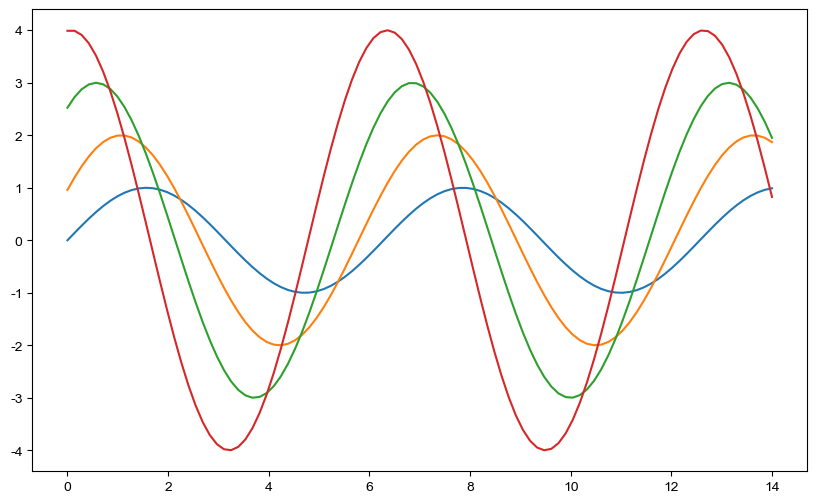

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

#### sns.despine()

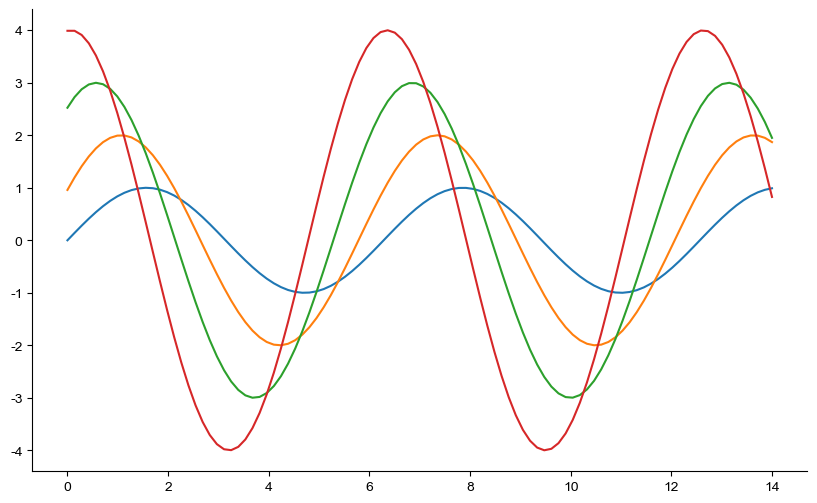

In [93]:
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
sns.despine() # 우측, 상단의 테두리가 없어짐
plt.show()

#### sns.set_style()
- `white`, `whitegrid`, `dark`, `darkgrid`

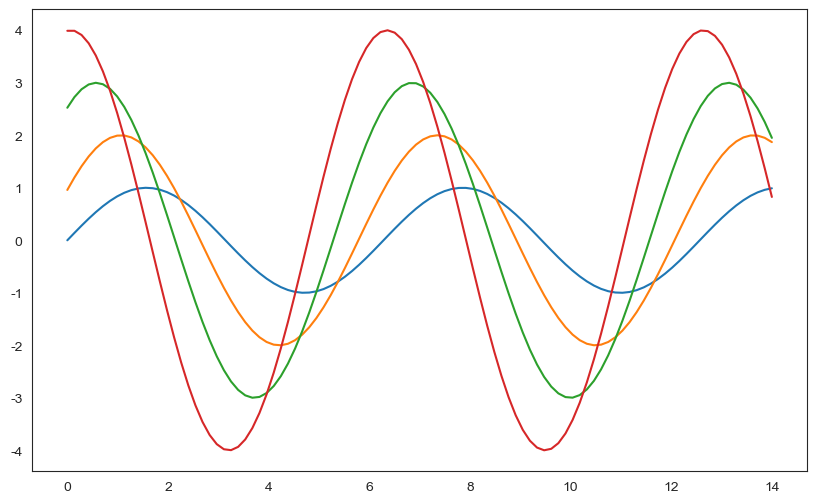

In [94]:
sns.set_style("white") # 그래프 뒷배경 설정(빈 흰 화면)
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

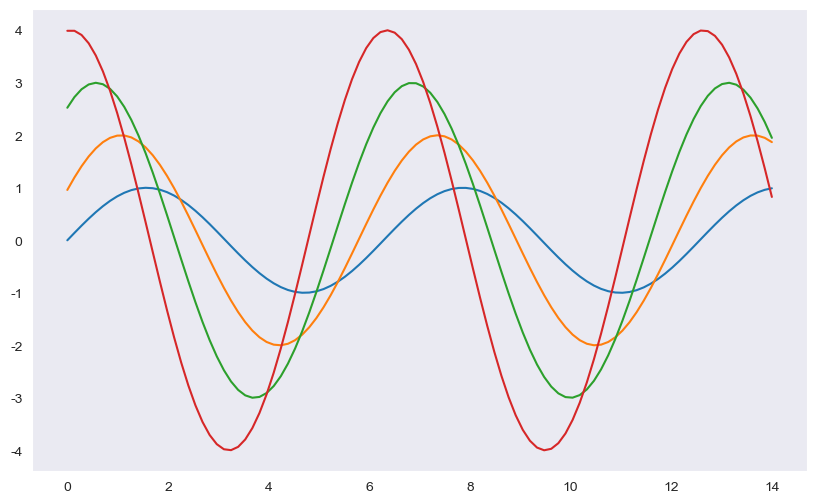

In [95]:
sns.set_style("dark") # 그래프 뒷배경 설정
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

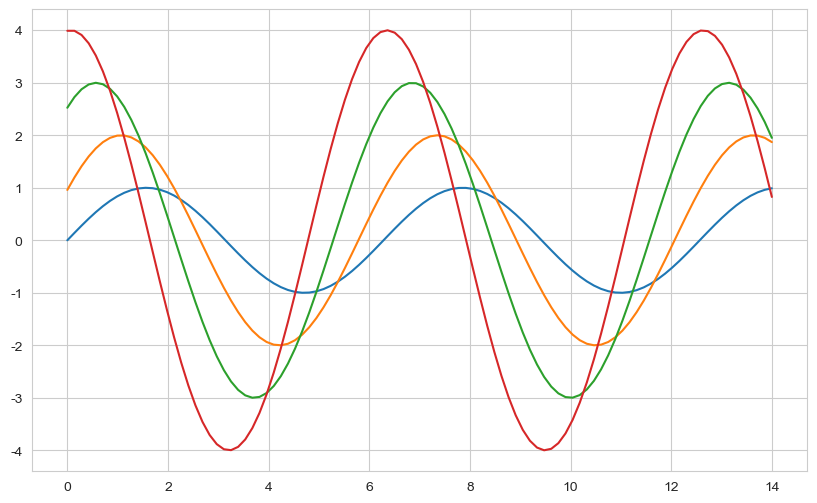

In [96]:
sns.set_style("whitegrid") # 그래프 뒷배경 설정
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

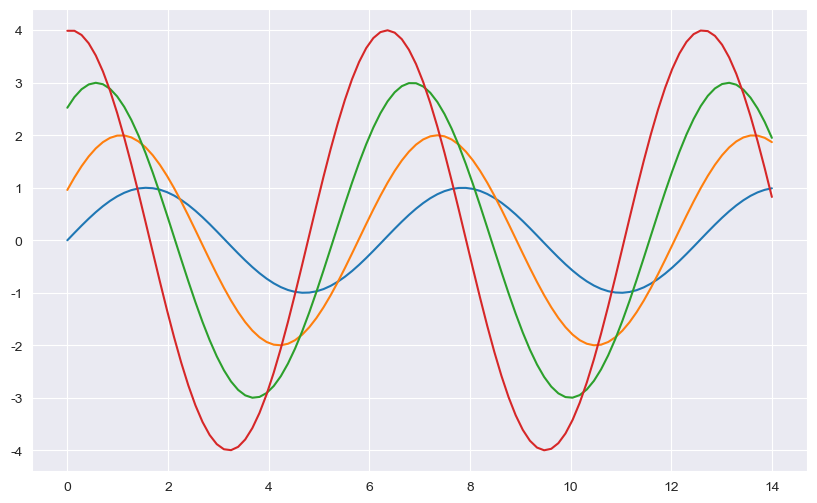

In [97]:
sns.set_style("darkgrid") # 그래프 뒷배경 설정
plt.figure(figsize=(10, 6))
plt.plot(x, y1, x, y2, x, y3, x, y4)
plt.show()

### 예제2 : seaborn tips data
- boxplot
- swarmplot
- lmplot

In [98]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [99]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### boxplot

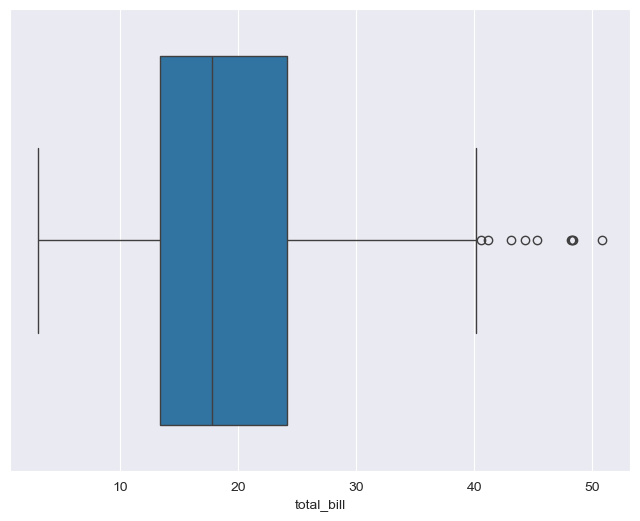

In [100]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=tips["total_bill"])
plt.show()

In [101]:
tips["day"].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

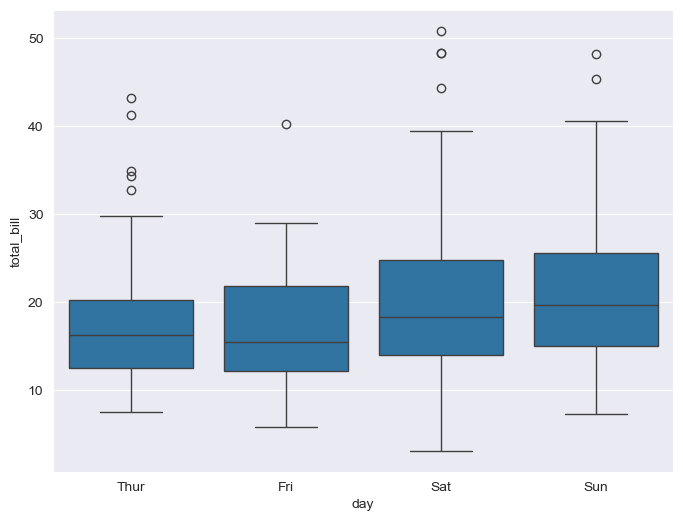

In [102]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()

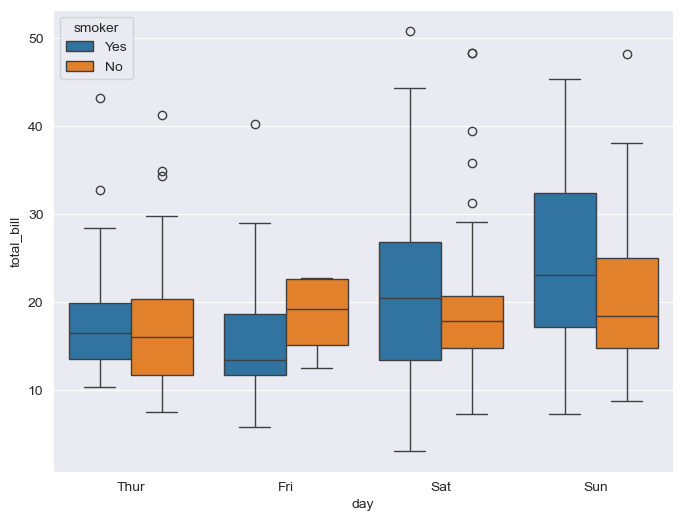

In [103]:
# boxplot hue, palette option
# hue : 카테고리 데이터를 표현하는 옵션

plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips, hue="smoker")
plt.show()

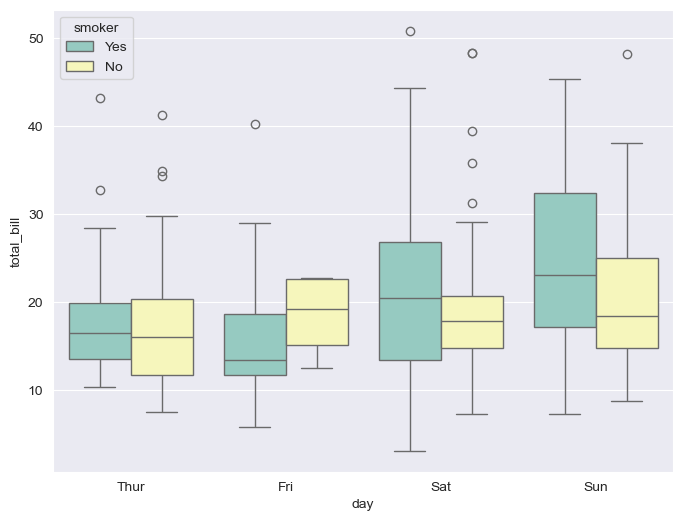

In [104]:
# boxplot hue, palette option

plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips, hue="smoker", palette="Set3") # Set1, Set2, Set3까지
plt.show()

#### swarmplot
- color: 0(검정)-1(흰) 사이 값을 조절

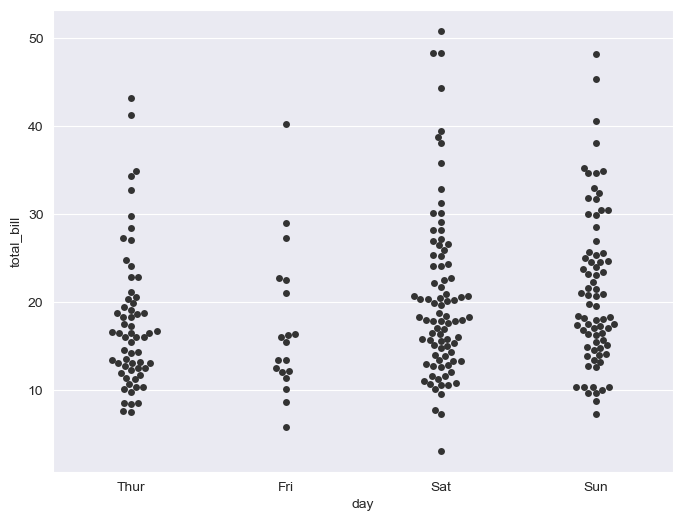

In [105]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.2") 
plt.show()

#### boxplot with swarmplot

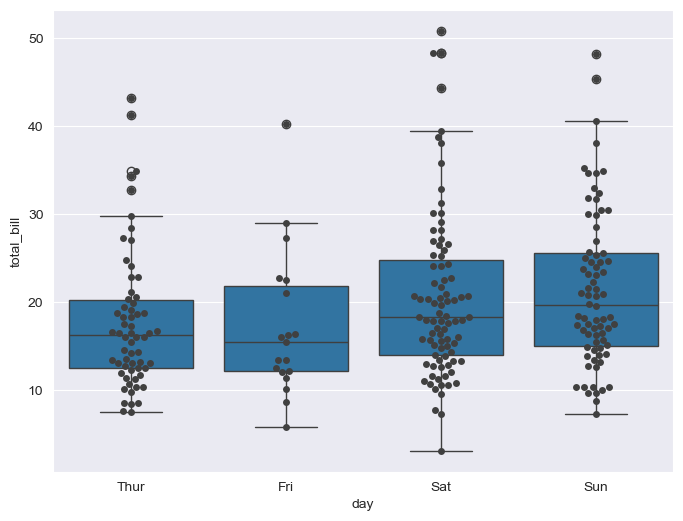

In [106]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="day", y="total_bill", data=tips)
sns.swarmplot(x="day", y="total_bill", data=tips, color="0.25")
plt.show()

#### lmplot
- total_bill과 tip 사이 관계 파악

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


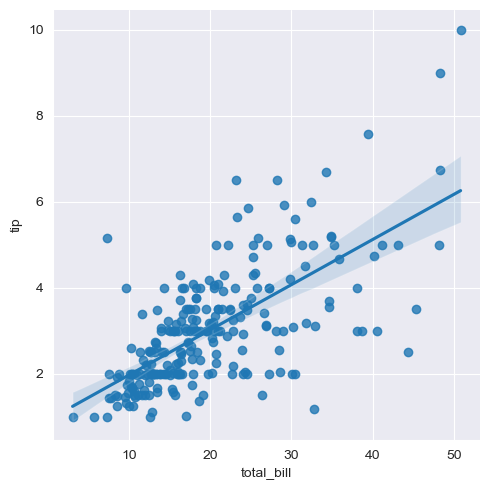

In [107]:
sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=5) # size => height 옵션명 바뀜
plt.show()

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


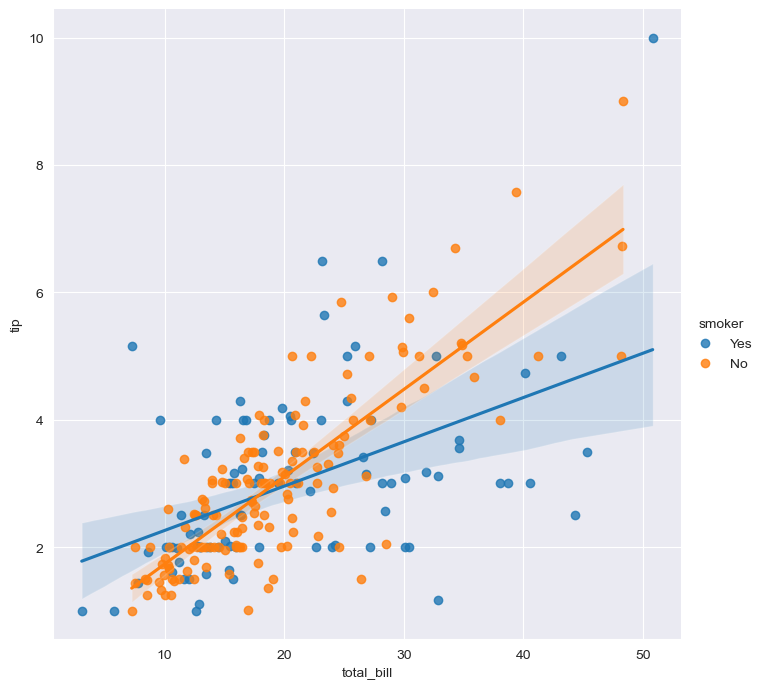

In [108]:
# hue option

sns.set_style("darkgrid")
sns.lmplot(x="total_bill", y="tip", data=tips, height=7, hue="smoker")
plt.show()

### 예제3 : flights data
- heatmap

In [109]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [110]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


In [111]:
flights.columns

Index(['year', 'month', 'passengers'], dtype='object')

#### pivot
- index, columns, values

In [112]:
flights = flights.pivot(index="month", columns="year", values="passengers")

In [113]:
flights.head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


#### heatmap
- annot : 맵 안에 value를 나타낼 건지에 대한 옵션(True, False)
- fmt : value가 맵 안에서 보일 자료형을 설정(d, f)

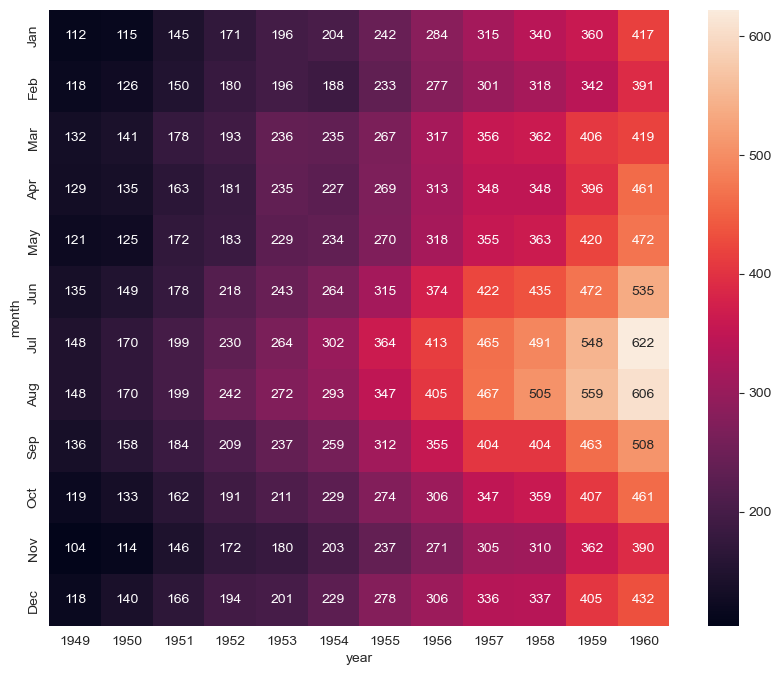

In [114]:
plt.figure(figsize=(10, 8))
sns.heatmap(data=flights, annot=True, fmt="d")
plt.show()

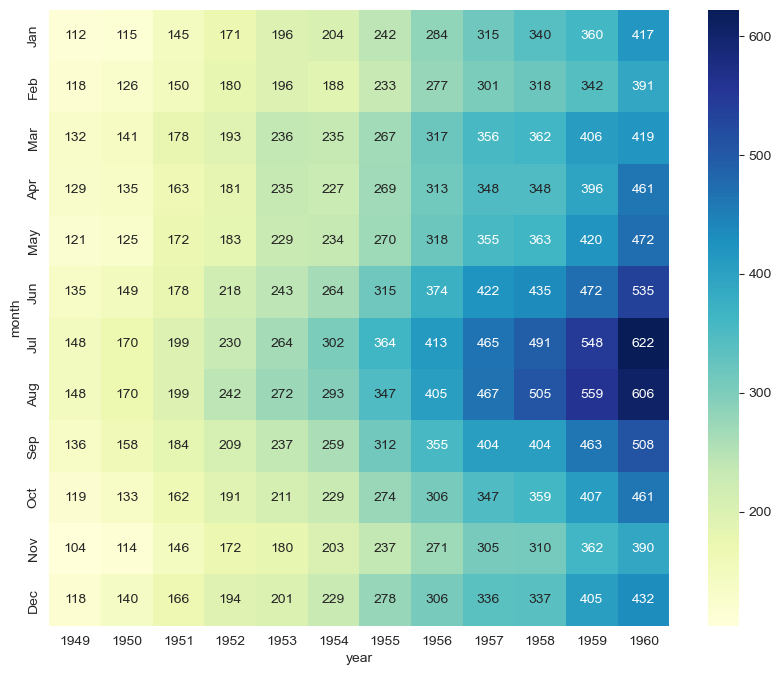

In [115]:
# colormap

plt.figure(figsize=(10,8))
sns.heatmap(flights, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

### 예제4 : iris data
- pairplot

In [116]:
iris = sns.load_dataset("iris")
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


#### pairplot

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


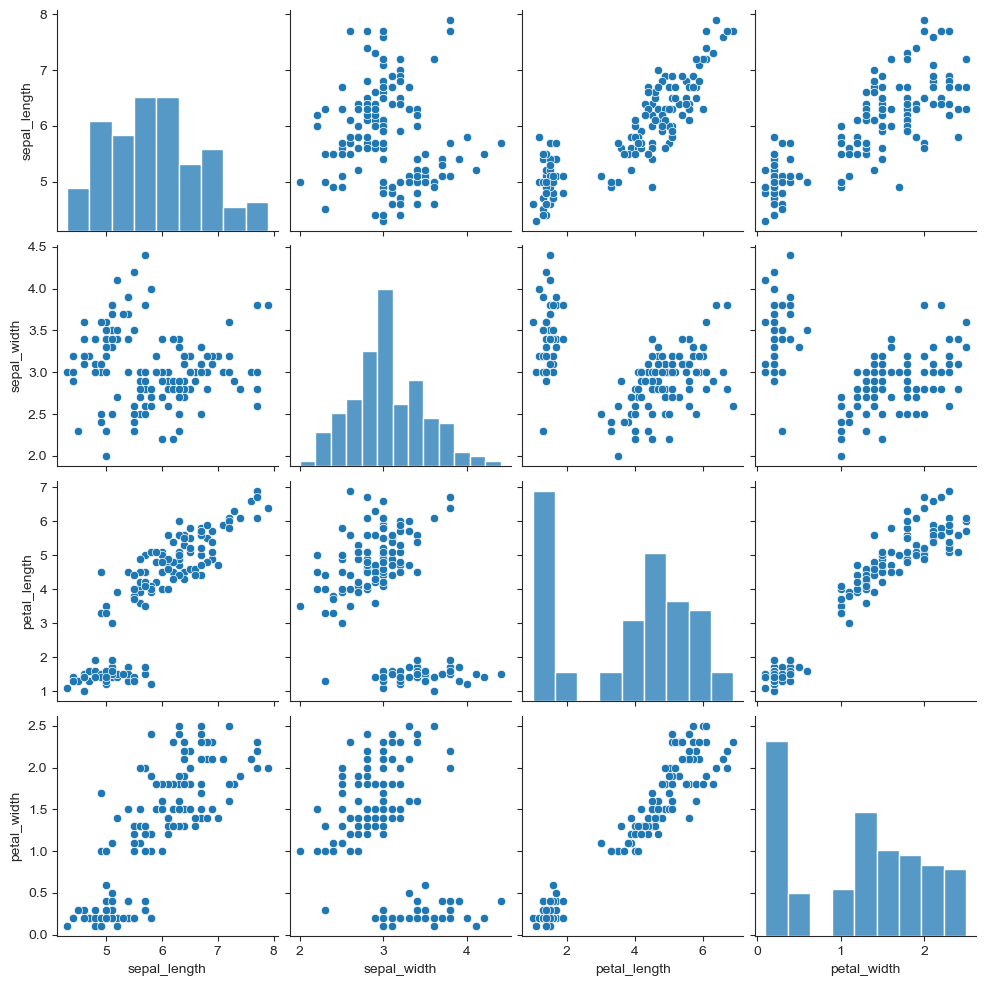

In [117]:
sns.set_style("ticks")
sns.pairplot(iris)
plt.show()

In [118]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [119]:
iris["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


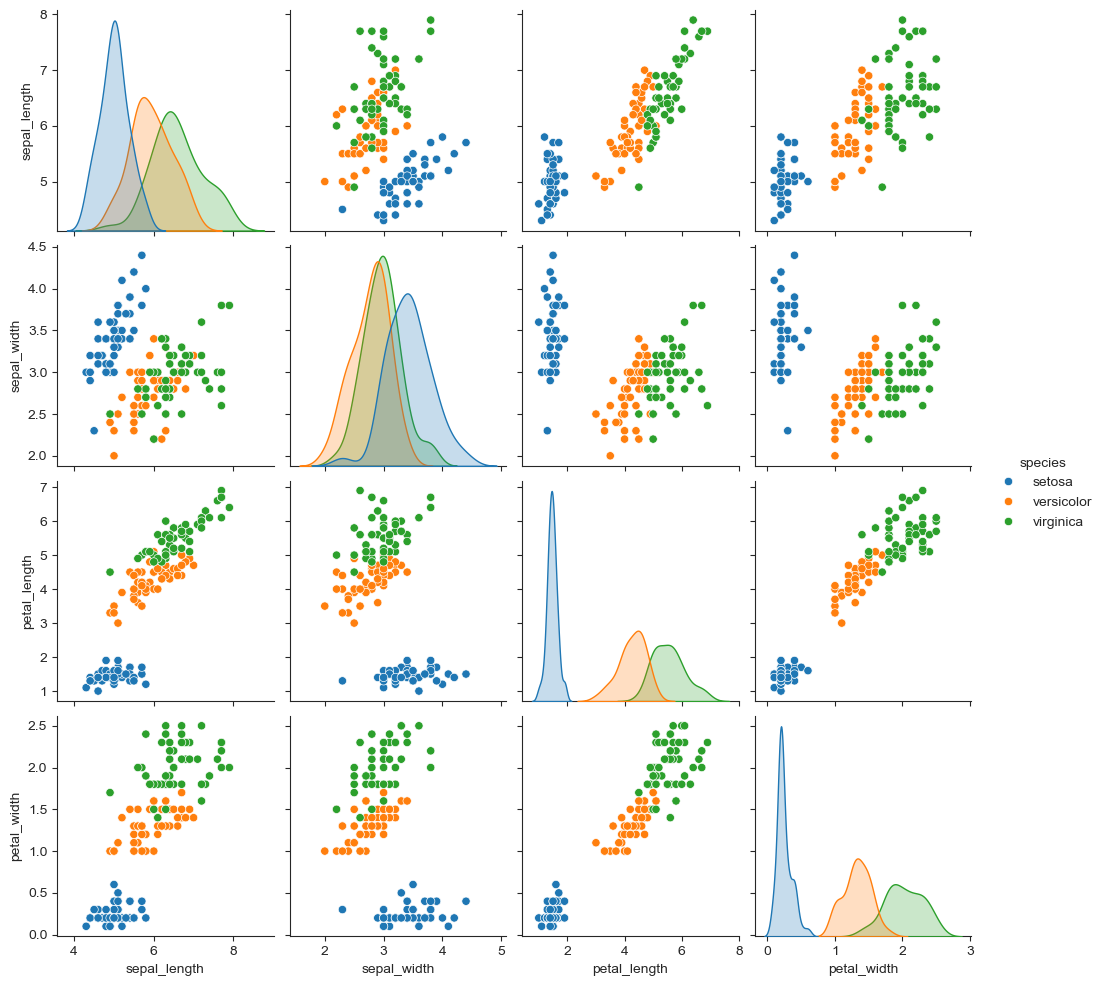

In [120]:
# hue option

sns.pairplot(iris, hue="species")
plt.show()

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


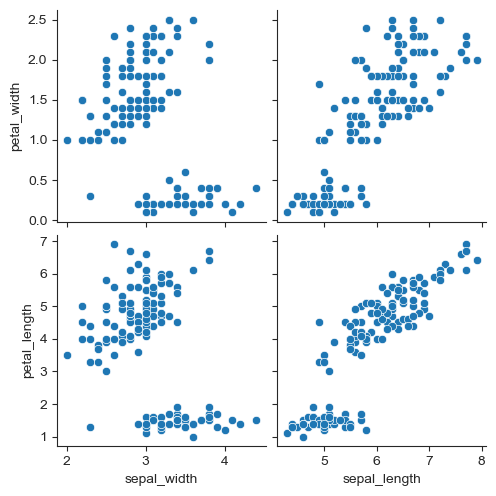

In [121]:
# 원하는 컬럼만 pairplog

sns.pairplot(iris, 
             x_vars=["sepal_width", "sepal_length"], 
             y_vars=["petal_width", "petal_length"])
plt.show()

### 예제5 : anscombe data

#### lmplot

In [122]:
anscombe = sns.load_dataset("anscombe")
anscombe.tail()

,dataset,x,y
39,IV,8.0,5.25
40,IV,19.0,12.50
41,IV,8.0,5.56
42,IV,8.0,7.91
43,IV,8.0,6.89


In [123]:
anscombe["dataset"].unique()

array(['I', 'II', 'III', 'IV'], dtype=object)

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


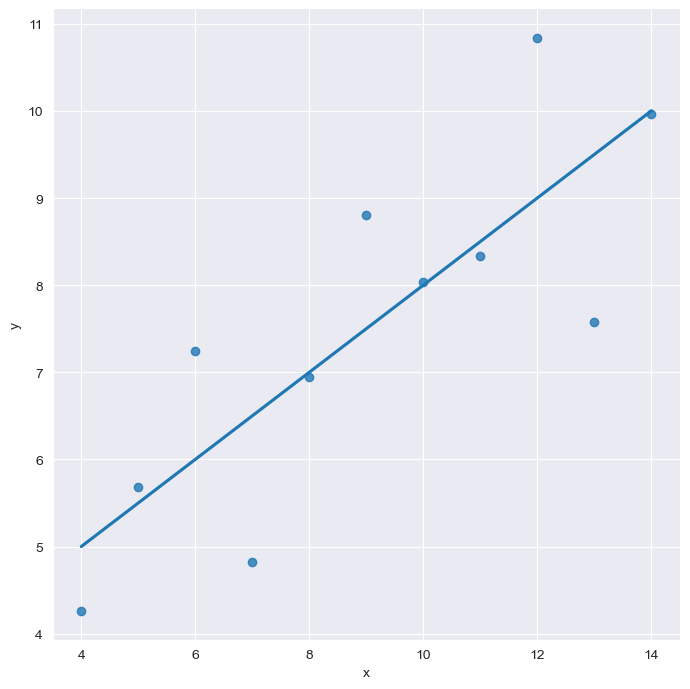

In [124]:
sns.set_style("darkgrid")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, height=7) #ci : 신뢰구간 선택
plt.show()

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


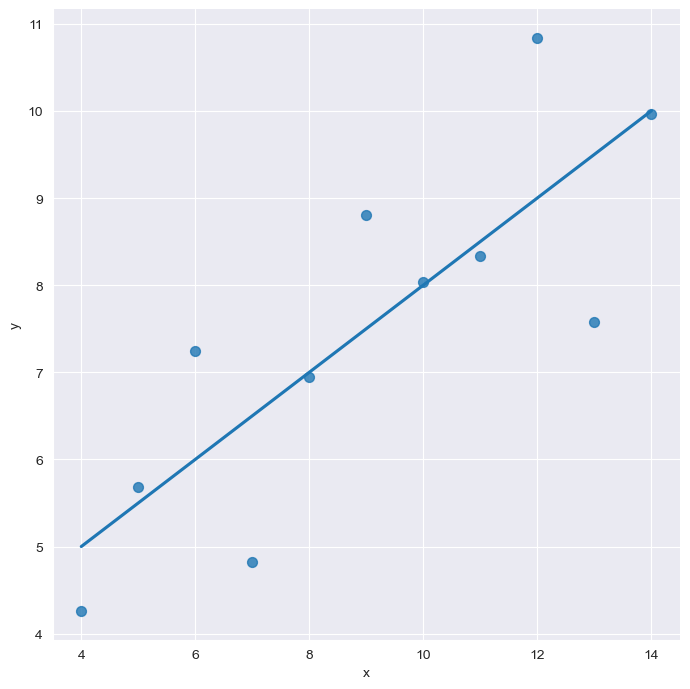

In [125]:
sns.set_style("darkgrid")
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"), ci=None, height=7, scatter_kws={"s": 50}) #ci : 신뢰구간 선택
plt.show()

##### order option

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


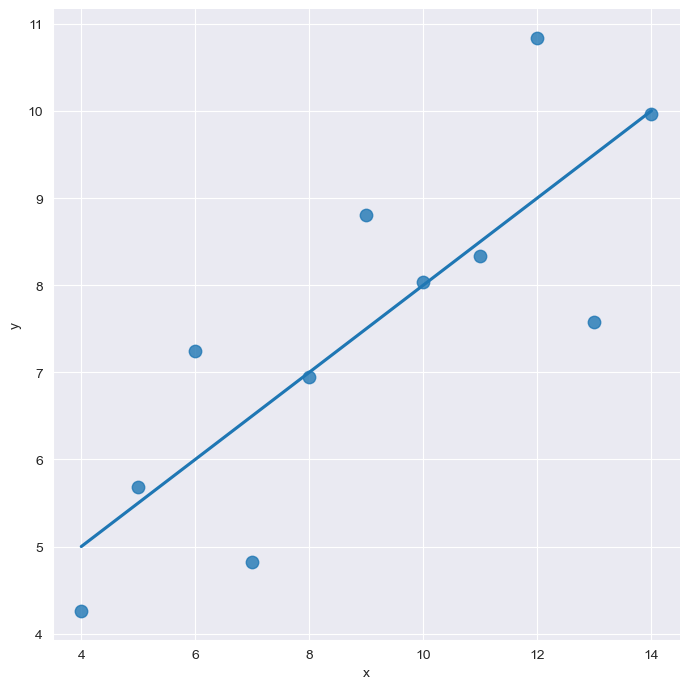

In [126]:
sns.set_style("darkgrid")
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe.query("dataset == 'I'"), 
    order=1,
    ci=None, 
    height=7,
    scatter_kws={"s": 80}) #ci : 신뢰구간 선택
plt.show()

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


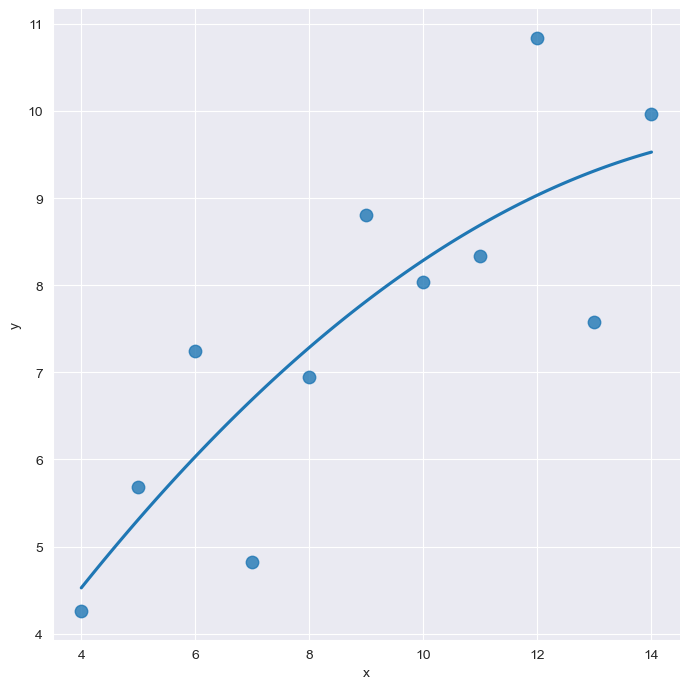

In [127]:
sns.set_style("darkgrid")
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe.query("dataset == 'I'"), 
    order=2,
    ci=None, 
    height=7,
    scatter_kws={"s": 80}) #ci : 신뢰구간 선택
plt.show()

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


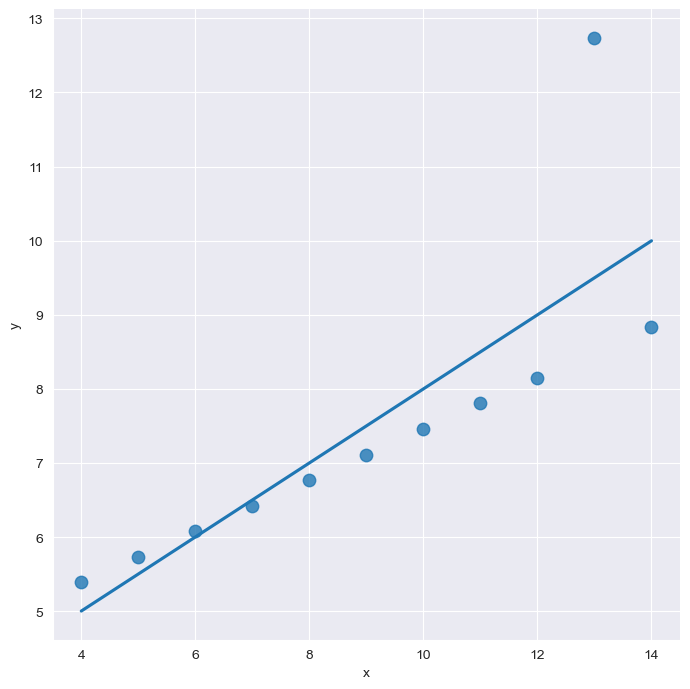

In [128]:
sns.set_style("darkgrid")
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe.query("dataset == 'III'"), 
    ci=None, 
    height=7,
    scatter_kws={"s": 80}) #ci : 신뢰구간 선택
plt.show()

##### outlier

In [129]:
import statsmodels

/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/usr/local/Caskroom/miniconda/base/envs/ds_study/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


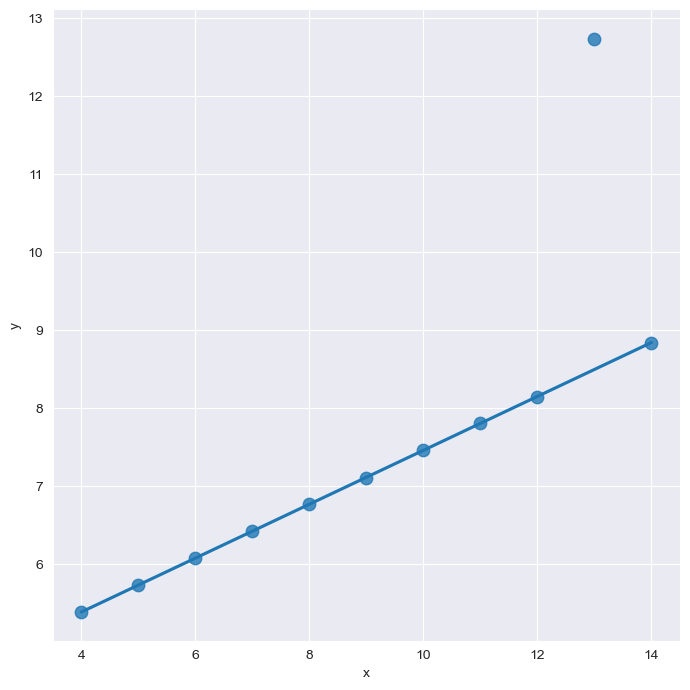

In [130]:
sns.set_style("darkgrid")
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe.query("dataset == 'III'"), 
    robust=True,
    ci=None, 
    height=7,
    scatter_kws={"s": 80}) #ci : 신뢰구간 선택
plt.show()